# Cleaning Charging Sessions Data Set

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from scipy.stats import zscore

### Load Data

In [2]:
df_ev = pd.read_csv("data/charging_sessions.csv")

### Inspect Data

In [3]:
df_ev

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil..."
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil..."
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi..."
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47+00:00,2019-08-01 00:34:51+00:00,2019-07-31 21:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil..."


In [4]:
print(df_ev.describe())    

         Unnamed: 0  kWhDelivered        siteID        userID
count  66450.000000  66450.000000  66450.000000  49187.000000
mean    4726.102062     11.787916      1.472656   1800.494582
std     3568.025394     10.314789      0.499256   2617.548614
min        0.000000      0.501000      1.000000      1.000000
25%     1845.000000      5.097000      1.000000    431.000000
50%     3960.000000      9.140000      1.000000    818.000000
75%     7027.000000     14.183000      2.000000   1805.000000
max    15291.000000    108.797242      2.000000  19923.000000


In [5]:
print(df_ev.shape) 

(66450, 13)


## Data Prep

### Assign correct Datatypes

In [6]:
print(df_ev.dtypes)

Unnamed: 0            int64
id                   object
connectionTime       object
disconnectTime       object
doneChargingTime     object
kWhDelivered        float64
sessionID            object
siteID                int64
spaceID              object
stationID            object
timezone             object
userID              float64
userInputs           object
dtype: object


In [7]:
df_ev['id'] = df_ev['id'].astype('string')

df_ev['connectionTime'] = pd.to_datetime(df_ev['connectionTime'], errors='coerce', utc=True)  
df_ev['disconnectTime'] = pd.to_datetime(df_ev['disconnectTime'], errors='coerce', utc=True)  
df_ev['doneChargingTime'] = pd.to_datetime(df_ev['doneChargingTime'], errors='coerce', utc=True) 

df_ev['connectionTime'] = df_ev['connectionTime'].dt.tz_convert('America/Los_Angeles')
df_ev['disconnectTime'] = df_ev['disconnectTime'].dt.tz_convert('America/Los_Angeles')
df_ev['doneChargingTime'] = df_ev['doneChargingTime'].dt.tz_convert('America/Los_Angeles')

df_ev['sessionID'] = df_ev['sessionID'].astype('string')
df_ev['siteID'] = df_ev['siteID'].astype('string')
df_ev['spaceID'] = df_ev['spaceID'].astype('string')
df_ev['stationID'] = df_ev['stationID'].astype('string')
df_ev['timezone'] = df_ev['timezone'].astype('string')
df_ev['userID'] = df_ev['userID'].astype('string')

### Seperate User Inputs

In [8]:
print(df_ev['userInputs'].head())

0    [{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...
1    [{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...
2    [{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...
3    [{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...
4    [{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...
Name: userInputs, dtype: object


In [9]:
#Convert list

df_ev['userInputs'] = df_ev['userInputs'].apply(
    lambda x: ast.literal_eval(x) if pd.notnull(x) else []
)

In [10]:
#explode list into rows
df_exploded = df_ev.explode('userInputs', ignore_index=True)

In [11]:
#normalize dictionaries into separate columns
df_normalized = pd.json_normalize(df_exploded['userInputs'])

#modify time datatype and convert to correct timezone
df_normalized['modifiedAt'] = pd.to_datetime(df_normalized['modifiedAt'], errors='coerce')
df_normalized['requestedDeparture'] = pd.to_datetime(df_normalized['requestedDeparture'], errors='coerce')

df_normalized['modifiedAt'] = df_normalized['modifiedAt'].dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles')
df_normalized['requestedDeparture'] = df_normalized['requestedDeparture'].dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles')

df_normalized['userID'] = df_normalized['userID'].astype('string')
df_normalized['paymentRequired'] = df_normalized['paymentRequired'].astype('bool')

In [12]:
print(df_normalized.dtypes)

WhPerMile                                         float64
kWhRequested                                      float64
milesRequested                                    float64
minutesAvailable                                  float64
modifiedAt            datetime64[ns, America/Los_Angeles]
paymentRequired                                      bool
requestedDeparture    datetime64[ns, America/Los_Angeles]
userID                                     string[python]
dtype: object


#### Removal of User Inputs from Charging Dataset

In [13]:
df_ev.drop(columns=['userInputs'], inplace=True)

### Look for duplicates

In [14]:
duplicateSessions = df_ev.duplicated(subset='sessionID').sum()
print("Duplicate Session IDs:", duplicateSessions)

Duplicate Session IDs: 1413


In [15]:
# Display duplicate rows
duplicateRows = df_ev[df_ev.duplicated(subset='sessionID')]

In [16]:
#Drop duplicates
df_ev.drop_duplicates(subset='sessionID', keep='first', inplace=True)

### Look for missing data

In [17]:
print(df_ev.isnull().sum())

Unnamed: 0              0
id                      0
connectionTime          0
disconnectTime          0
doneChargingTime     4087
kWhDelivered            0
sessionID               0
siteID                  0
spaceID                 0
stationID               0
timezone                0
userID              17215
dtype: int64


### Handle missing data

In [18]:
# Copy for safety
charging_data = df_ev.copy()

In [19]:
charging_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65037 entries, 0 to 65036
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype                              
---  ------            --------------  -----                              
 0   Unnamed: 0        65037 non-null  int64                              
 1   id                65037 non-null  string                             
 2   connectionTime    65037 non-null  datetime64[ns, America/Los_Angeles]
 3   disconnectTime    65037 non-null  datetime64[ns, America/Los_Angeles]
 4   doneChargingTime  60950 non-null  datetime64[ns, America/Los_Angeles]
 5   kWhDelivered      65037 non-null  float64                            
 6   sessionID         65037 non-null  string                             
 7   siteID            65037 non-null  string                             
 8   spaceID           65037 non-null  string                             
 9   stationID         65037 non-null  string                          

In [20]:
#analyze proportion of missing values
missing_proportion = charging_data['doneChargingTime'].isnull().mean()
print(f"Proportion of missing 'doneChargingTime' values: {missing_proportion:.2%}")

# investigate patterns
print(charging_data[charging_data['doneChargingTime'].isnull()].describe())

Proportion of missing 'doneChargingTime' values: 6.28%
         Unnamed: 0  kWhDelivered
count   4087.000000   4087.000000
mean    2341.231955     13.986472
std     2286.691867     11.767162
min        0.000000      0.502000
25%      639.500000      5.784500
50%     1203.000000     10.899000
75%     3805.500000     18.145000
max    14871.000000     77.700000


In [21]:
#charging_data = charging_data.dropna(subset=['doneChargingTime'])
print(charging_data.isnull().sum())

Unnamed: 0              0
id                      0
connectionTime          0
disconnectTime          0
doneChargingTime     4087
kWhDelivered            0
sessionID               0
siteID                  0
spaceID                 0
stationID               0
timezone                0
userID              17215
dtype: int64


In [22]:
charging_data[charging_data['doneChargingTime'].isnull()]

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID
3756,3756,5ea3848df9af8b428bf97225,2020-04-08 09:36:53-07:00,2020-04-08 20:43:29-07:00,NaT,25.183,1_1_194_822_2020-04-08 16:36:53.316264,1,AG-1F12,1-1-194-822,America/Los_Angeles,507.0
3757,3757,5ea4d60df9af8b46573f1ee7,2020-04-09 06:23:52-07:00,2020-04-09 10:59:02-07:00,NaT,14.136,1_1_193_827_2020-04-09 13:23:51.689520,1,AG-1F02,1-1-193-827,America/Los_Angeles,419.0
3758,3758,5ea4d60df9af8b46573f1ee8,2020-04-09 06:40:03-07:00,2020-04-09 14:43:22-07:00,NaT,14.203,1_1_178_823_2020-04-09 13:39:55.115497,1,AG-1F08,1-1-178-823,America/Los_Angeles,5065.0
3759,3759,5ea4d60df9af8b46573f1ee9,2020-04-09 07:01:53-07:00,2020-04-09 09:33:40-07:00,NaT,13.041,1_1_178_828_2020-04-09 14:01:53.467693,1,AG-1F10,1-1-178-828,America/Los_Angeles,651.0
3760,3760,5ea4d60df9af8b46573f1eea,2020-04-09 08:01:06-07:00,2020-04-09 16:38:08-07:00,NaT,5.797,1_1_193_820_2020-04-09 15:01:06.343454,1,AG-1F04,1-1-193-820,America/Los_Angeles,466.0
...,...,...,...,...,...,...,...,...,...,...,...,...
60396,4034,5cb3d2a8f9af8b4551261e66,2019-03-29 09:54:49-07:00,2019-03-29 14:55:22-07:00,NaT,15.753,1_1_179_799_2019-03-29 16:54:49.239801,1,AG-3F25,1-1-179-799,America/Los_Angeles,1078.0
60411,4049,5cb3d2a8f9af8b4551261e75,2019-03-29 17:32:10-07:00,2019-03-29 19:23:14-07:00,NaT,11.148,1_1_193_829_2019-03-30 00:32:10.128651,1,AG-1F03,1-1-193-829,America/Los_Angeles,194.0
61097,4735,5cc8e891f9af8b45d975b819,2019-04-14 09:19:12-07:00,2019-04-14 13:38:39-07:00,NaT,11.678,1_1_193_816_2019-04-14 16:19:11.864262,1,AG-1F05,1-1-193-816,America/Los_Angeles,364.0
61103,4741,5cca3a54f9af8b49aaa4cbac,2019-04-15 06:00:59-07:00,2019-04-15 06:55:25-07:00,NaT,3.343,1_1_193_819_2019-04-15 13:00:58.722284,1,AG-1F06,1-1-193-819,America/Los_Angeles,651.0


In [23]:
# set missing doneChargingTime to disconnectTime
charging_data['doneChargingTime'] = charging_data['doneChargingTime'].fillna(charging_data['disconnectTime'])

In [24]:
print(charging_data.isnull().sum())

Unnamed: 0              0
id                      0
connectionTime          0
disconnectTime          0
doneChargingTime        0
kWhDelivered            0
sessionID               0
siteID                  0
spaceID                 0
stationID               0
timezone                0
userID              17215
dtype: int64


In [25]:
#show charing_data rows 3756 to 37660
charging_data[3756:3760]

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID
3756,3756,5ea3848df9af8b428bf97225,2020-04-08 09:36:53-07:00,2020-04-08 20:43:29-07:00,2020-04-08 20:43:29-07:00,25.183,1_1_194_822_2020-04-08 16:36:53.316264,1,AG-1F12,1-1-194-822,America/Los_Angeles,507.0
3757,3757,5ea4d60df9af8b46573f1ee7,2020-04-09 06:23:52-07:00,2020-04-09 10:59:02-07:00,2020-04-09 10:59:02-07:00,14.136,1_1_193_827_2020-04-09 13:23:51.689520,1,AG-1F02,1-1-193-827,America/Los_Angeles,419.0
3758,3758,5ea4d60df9af8b46573f1ee8,2020-04-09 06:40:03-07:00,2020-04-09 14:43:22-07:00,2020-04-09 14:43:22-07:00,14.203,1_1_178_823_2020-04-09 13:39:55.115497,1,AG-1F08,1-1-178-823,America/Los_Angeles,5065.0
3759,3759,5ea4d60df9af8b46573f1ee9,2020-04-09 07:01:53-07:00,2020-04-09 09:33:40-07:00,2020-04-09 09:33:40-07:00,13.041,1_1_178_828_2020-04-09 14:01:53.467693,1,AG-1F10,1-1-178-828,America/Los_Angeles,651.0


### Look for erroneous data

In [26]:
disconnectBeforeConnect = charging_data[charging_data['disconnectTime'] < charging_data['connectionTime']]
print(f"DisconnectTime before connectionTime: {disconnectBeforeConnect.shape[0]}")

DisconnectTime before connectionTime: 0


In [27]:
doneBeforeConnect = charging_data[charging_data['doneChargingTime'] < charging_data['connectionTime']]
print(f"doneChargingTime before connectionTime: {doneBeforeConnect.shape[0]}")

doneChargingTime before connectionTime: 27


In [28]:
doneAfterDisconnect = charging_data[charging_data['doneChargingTime'] > charging_data['disconnectTime']]
print(f"doneChargingTime after disconnectionTime: {doneBeforeConnect.shape[0]}")

doneChargingTime after disconnectionTime: 27


In [29]:
doneAfterDisconnect

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID
12,12,5e23b149f9af8b5fe4b973db,2020-01-02 07:04:38-08:00,2020-01-02 14:08:39-08:00,2020-01-02 14:09:36-08:00,25.567,1_1_178_824_2020-01-02 15:04:38.051735,1,AG-1F07,1-1-178-824,America/Los_Angeles,528.0
20,20,5e23b149f9af8b5fe4b973e3,2020-01-02 07:28:47-08:00,2020-01-02 11:01:54-08:00,2020-01-02 11:02:51-08:00,7.417,1_1_193_827_2020-01-02 15:28:46.685366,1,AG-1F02,1-1-193-827,America/Los_Angeles,1283.0
25,25,5e23b149f9af8b5fe4b973e8,2020-01-02 07:42:05-08:00,2020-01-02 13:58:45-08:00,2020-01-02 13:59:42-08:00,36.701,1_1_179_797_2020-01-02 15:42:05.217965,1,AG-3F23,1-1-179-797,America/Los_Angeles,474.0
26,26,5e23b149f9af8b5fe4b973e9,2020-01-02 07:57:24-08:00,2020-01-02 08:35:37-08:00,2020-01-02 08:36:34-08:00,3.689,1_1_179_781_2020-01-02 15:57:23.951170,1,AG-3F31,1-1-179-781,America/Los_Angeles,724.0
33,33,5e23b149f9af8b5fe4b973f0,2020-01-02 08:34:35-08:00,2020-01-02 10:49:41-08:00,2020-01-02 10:50:38-08:00,7.120,1_1_179_790_2020-01-02 16:34:34.999200,1,AG-3F19,1-1-179-790,America/Los_Angeles,2276.0
...,...,...,...,...,...,...,...,...,...,...,...,...
65028,8666,5d2fbdd3f9af8b4d0dd0d546,2019-07-01 12:20:31-07:00,2019-07-01 17:16:32-07:00,2019-07-01 17:16:42-07:00,26.324,1_1_179_783_2019-07-01 19:20:30.955300,1,AG-3F29,1-1-179-783,America/Los_Angeles,458.0
65030,8668,5d2fbdd3f9af8b4d0dd0d548,2019-07-01 13:01:07-07:00,2019-07-01 17:32:26-07:00,2019-07-01 17:32:59-07:00,21.588,1_1_179_800_2019-07-01 20:01:06.782562,1,AG-3F32,1-1-179-800,America/Los_Angeles,1479.0
65033,8671,5d2fbdd3f9af8b4d0dd0d54b,2019-07-01 14:58:45-07:00,2019-07-01 17:39:48-07:00,2019-07-01 17:40:21-07:00,16.864,1_1_179_794_2019-07-01 21:58:44.571011,1,AG-3F20,1-1-179-794,America/Los_Angeles,364.0
65034,8672,5d2fbdd3f9af8b4d0dd0d54c,2019-07-01 15:02:21-07:00,2019-07-01 17:58:50-07:00,2019-07-01 17:59:23-07:00,18.335,1_1_191_807_2019-07-01 22:02:20.810735,1,AG-4F47,1-1-191-807,America/Los_Angeles,2050.0


In [30]:
# change rows where doneChargingTime is after disconnect time to disconnect time
charging_data.loc[charging_data['doneChargingTime'] > charging_data['disconnectTime'], 'doneChargingTime'] = charging_data['disconnectTime']

In [31]:
#display cahrging data from 12 to 33    
charging_data[12:33]

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID
12,12,5e23b149f9af8b5fe4b973db,2020-01-02 07:04:38-08:00,2020-01-02 14:08:39-08:00,2020-01-02 14:08:39-08:00,25.567,1_1_178_824_2020-01-02 15:04:38.051735,1,AG-1F07,1-1-178-824,America/Los_Angeles,528.0
13,13,5e23b149f9af8b5fe4b973dc,2020-01-02 07:15:27-08:00,2020-01-02 15:55:10-08:00,2020-01-02 14:01:53-08:00,39.806,1_1_194_822_2020-01-02 15:15:26.800815,1,AG-1F12,1-1-194-822,America/Los_Angeles,500.0
14,14,5e23b149f9af8b5fe4b973dd,2020-01-02 07:19:05-08:00,2020-01-02 12:23:34-08:00,2020-01-02 10:12:46-08:00,17.268,1_1_179_783_2020-01-02 15:19:05.085113,1,AG-3F29,1-1-179-783,America/Los_Angeles,2678.0
15,15,5e23b149f9af8b5fe4b973de,2020-01-02 07:21:27-08:00,2020-01-02 16:13:19-08:00,2020-01-02 11:14:54-08:00,9.163,1_1_193_816_2020-01-02 15:21:26.787754,1,AG-1F05,1-1-193-816,America/Los_Angeles,607.0
16,16,5e23b149f9af8b5fe4b973df,2020-01-02 07:22:24-08:00,2020-01-02 16:01:40-08:00,2020-01-02 09:11:59-08:00,5.085,1_1_179_798_2020-01-02 15:22:24.419444,1,AG-3F18,1-1-179-798,America/Los_Angeles,577.0
17,17,5e23b149f9af8b5fe4b973e0,2020-01-02 07:23:27-08:00,2020-01-02 11:30:34-08:00,2020-01-02 10:34:05-08:00,6.730,1_1_178_828_2020-01-02 15:23:18.615284,1,AG-1F10,1-1-178-828,America/Los_Angeles,3399.0
18,18,5e23b149f9af8b5fe4b973e1,2020-01-02 07:26:55-08:00,2020-01-02 14:23:50-08:00,2020-01-02 12:35:34-08:00,12.067,1_1_179_787_2020-01-02 15:26:54.779981,1,AG-3F16,1-1-179-787,America/Los_Angeles,1797.0
19,19,5e23b149f9af8b5fe4b973e2,2020-01-02 07:27:29-08:00,2020-01-02 17:33:02-08:00,2020-01-02 11:31:22-08:00,11.687,1_1_191_792_2020-01-02 15:27:28.718636,1,AG-4F37,1-1-191-792,America/Los_Angeles,2129.0
20,20,5e23b149f9af8b5fe4b973e3,2020-01-02 07:28:47-08:00,2020-01-02 11:01:54-08:00,2020-01-02 11:01:54-08:00,7.417,1_1_193_827_2020-01-02 15:28:46.685366,1,AG-1F02,1-1-193-827,America/Los_Angeles,1283.0
21,21,5e23b149f9af8b5fe4b973e4,2020-01-02 07:30:19-08:00,2020-01-02 16:53:54-08:00,2020-01-02 15:53:42-08:00,49.874,1_1_179_777_2020-01-02 15:30:18.640728,1,AG-3F28,1-1-179-777,America/Los_Angeles,4475.0


In [32]:
display(doneBeforeConnect[['connectionTime', 'doneChargingTime']].head())

,connectionTime,doneChargingTime
22219,2019-03-05 11:13:55-08:00,2019-03-05 11:12:56-08:00
22253,2019-03-06 12:26:30-08:00,2019-03-06 12:25:34-08:00
23562,2019-04-15 13:24:13-07:00,2019-04-15 13:23:14-07:00
23586,2019-04-16 09:11:08-07:00,2019-04-16 09:10:11-07:00
27689,2019-09-04 09:35:04-07:00,2019-09-04 09:34:05-07:00


In [33]:
# Drop rows where doneChargingTime is before connectionTime
charging_data.drop(charging_data[charging_data['doneChargingTime'] < charging_data['connectionTime']].index, inplace=True)


### Look for outliers

In [34]:
charging_data['chargingDuration'] = ((charging_data['doneChargingTime'] - charging_data['connectionTime']).dt.total_seconds()) / 60

Outliers in kWhDelivered: 5595
Outliers in chargingDuration: 1810


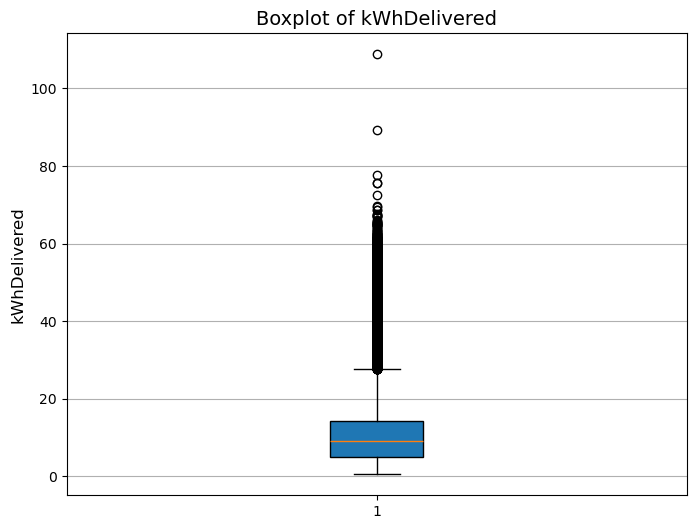

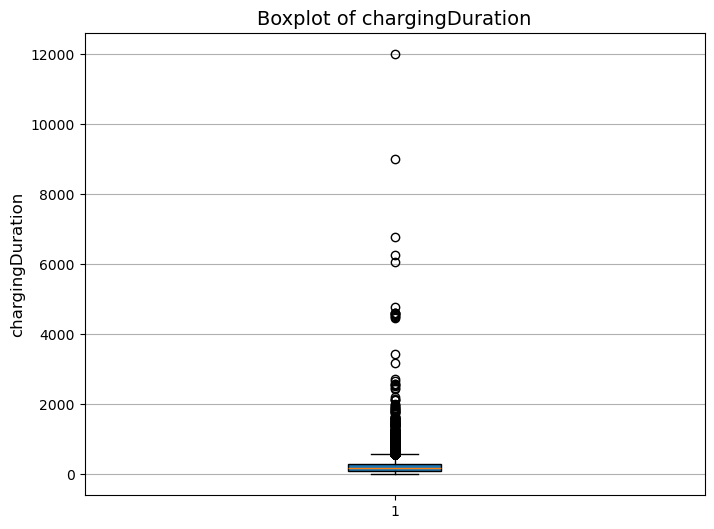

In [35]:
# Detect outliers using the IQR method
numerical_columns = ['kWhDelivered', 'chargingDuration']
for column in numerical_columns:
    Q1 = charging_data[column].quantile(0.25)  # First quartile
    Q3 = charging_data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = charging_data[(charging_data[column] < lower_bound) | (charging_data[column] > upper_bound)]
    print(f"Outliers in {column}: {len(outliers)}")

# Boxplot for each column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(charging_data[column].dropna(), vert=True, patch_artist=True, showfliers=True)
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.ylabel(column, fontsize=12)
    plt.grid(axis='y')
    plt.show()

In [36]:
highkWhDelivered = charging_data[charging_data['kWhDelivered'] > 80]
print(f"Rows with very High kWhDelivered: {highkWhDelivered.shape[0]}")

Rows with very High kWhDelivered: 2


In [37]:
#analyze outliers with unrealistic charging durations
longChargingDuration = charging_data[(charging_data['chargingDuration'] > 3000)]
print(f"Number of rows longer than 4000 minutes: {longChargingDuration.shape[0]}")

Number of rows longer than 4000 minutes: 16


In [38]:
charging_data.drop(charging_data[charging_data['chargingDuration'] > 3000].index, inplace=True)
charging_data.drop(charging_data[charging_data['kWhDelivered'] > 80].index, inplace=True)

Outliers in kWhDelivered: 5592
Outliers in chargingDuration: 1796


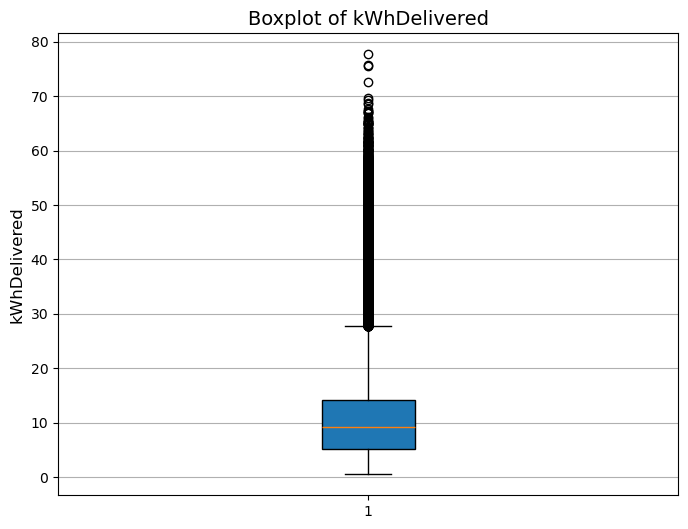

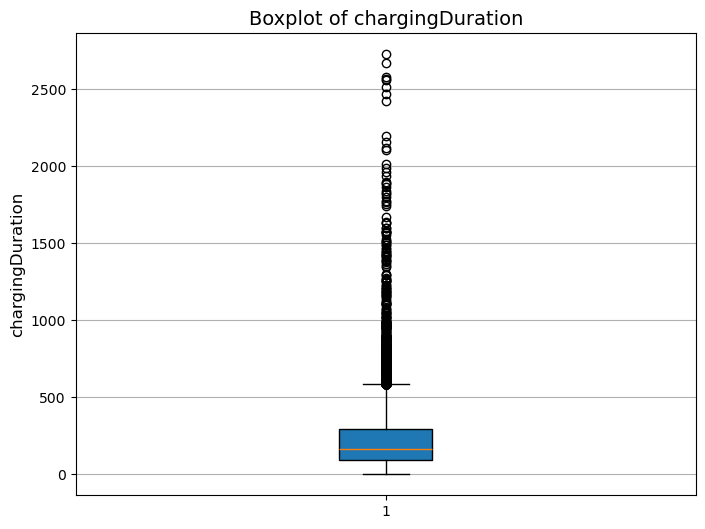

In [39]:
numerical_columns = ['kWhDelivered', 'chargingDuration']
for column in numerical_columns:
    Q1 = charging_data[column].quantile(0.25)  # First quartile
    Q3 = charging_data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = charging_data[(charging_data[column] < lower_bound) | (charging_data[column] > upper_bound)]
    print(f"Outliers in {column}: {len(outliers)}")

# Boxplot for each column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(charging_data[column].dropna(), vert=True, patch_artist=True, showfliers=True)
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.ylabel(column, fontsize=12)
    plt.grid(axis='y')
    plt.show()

### Save cleaned datasets

In [40]:
charging_data.to_csv('data/cleaned_chargingdata.csv')
df_normalized.to_csv('data/userInputs.csv')